# Homework 3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from treeviz import tree_print
import dtreeviz

# Part 1: Play Tennis Decision Tree

### The Data
The dataset contains several labels, including boolean values that show whether the day did (1) or didn't (0) have a particular outlook, such as sunny or overcast. There are also numerical values representing temperature and humidity, and a value which states whether or not tennis was played on this day.

In [3]:
tennis_df = pd.read_csv("https://raw.githubusercontent.com/IndraniMandal/CSC310-S20/master/notes/assets/tennis_numeric.csv")
tennis_df

,outlook_sunny,outlook_overcast,outlook_rainy,temperature,humidity,windy,play
0,1,0,0,85,85,0,no
1,1,0,0,80,90,1,no
2,0,1,0,83,86,0,yes
3,0,0,1,70,96,0,yes
4,0,0,1,68,80,0,yes
5,0,0,1,65,70,1,no
6,0,1,0,64,65,1,yes
7,1,0,0,72,95,0,no
8,1,0,0,69,70,0,yes
9,0,0,1,75,80,0,yes


 ### Features
 The features of the dataset are all columns except for the target variable (play). All are numerical values, so no further processing is needed.

In [4]:
tfeatures_df = tennis_df.drop(['play'], axis = 1)
tfeatures_df.head()

,outlook_sunny,outlook_overcast,outlook_rainy,temperature,humidity,windy
0,1,0,0,85,85,0
1,1,0,0,80,90,1
2,0,1,0,83,86,0
3,0,0,1,70,96,0
4,0,0,1,68,80,0


The categories of feature variables:

In [5]:
tfeatures_df.columns

Index(['outlook_sunny', 'outlook_overcast', 'outlook_rainy', 'temperature',
       'humidity', 'windy'],
      dtype='object')

### Target Data
The target data can be found in a single column of the dataset, the play column, since we're trying to determine whether tennis will be played based on all other factors in the data.

In [6]:
ttarget_df = pd.DataFrame(tennis_df.play)
ttarget_df.head()

,play
0,no
1,no
2,yes
3,yes
4,yes


### Transforming Target
In order to use the info from this target data frame, it needs to be converted to a format what can be passed directly to dtree.fit(). This means replacing strings with numerical values and creating an array.

In [7]:
import numpy as np
ti_target_df = ttarget_df
ti_target_df['play'].replace(['no', 'yes'], [0, 1], inplace = True)
ti_target_df = ti_target_df.to_numpy()
ti_target_df = ti_target_df.flatten()
ti_target_df

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

### Decision Tree
The tree itself is created with entropy as its criterion, so the tree attempts to maximize the amount of entropy eliminated in the data at each decision. Then the tree is fitted to the features and target data.

In [8]:
tennis_dtree = tree.DecisionTreeClassifier(criterion = 'entropy')
tennis_dtree.fit(tfeatures_df, ttarget_df)

DecisionTreeClassifier(criterion='entropy')

### Tree Visualization

The treeviz module is used to print a pseudocode representation of the decision tree. You can see that the model is relatively simple, with a few clear rules that only require the tree to go three decisions deep in order to predict whether tennis is played with 100% accuracy. If it's overcast, we'll play. Then not, then it only takes two decisions about humidity and temperature to determine what to do.

In [9]:
from sklearn.metrics import accuracy_score
tennis_predictions = tennis_dtree.predict(tfeatures_df)
tennis_accuracy = accuracy_score(ttarget_df, tennis_predictions) * 100
print("The model is {:.2f}% accurate when used to predict its own training data.\n".format(tennis_accuracy))
tree_print(tennis_dtree, tfeatures_df)

The model is 100.00% accurate when used to predict its own training data.

if outlook_overcast =< 0.5: 
  |then if humidity =< 82.5: 
  |  |then if temperature =< 66.5: 
  |  |  |then 0
  |  |  |else 1
  |  |else if humidity =< 95.5: 
  |  |  |then 0
  |  |  |else 1
  |else 1
<------->
Tree Depth:  3


### Dtreeviz Model
Some of the patterns from the above pseudocode are easily decipherable below:
 - Overcast outlooks means we always play
 - Humidity under 82.5 and sufficiently warm temperature means we play
 - Excessive humidity means no playing

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


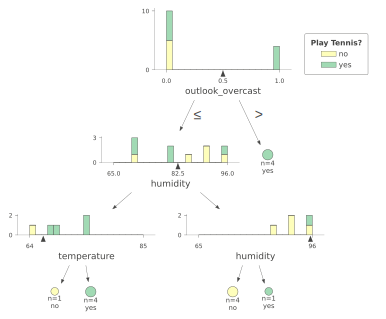

In [10]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

tennis_viz = dtreeviz.model(tennis_dtree,
                     X_train = tfeatures_df,
                     y_train = ti_target_df,
                     target_name = 'Play Tennis?',
                     feature_names = tfeatures_df.columns,
                     class_names = ['no', 'yes']
                     )
tennis_viz.view()

### Restricting Complexity
A tree of depth 3 isn't terribly complex, but if a simpler model was needed, a tree could be made with restricted depth.

In [11]:
restricted_tennis_dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
restricted_tennis_dtree.fit(tfeatures_df, ttarget_df)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

### Simpler Model
In this case, the simpler model still does a decent job of predicted whether or not tennis should be played. If I were choosing one for practical use, I still think I would choose the unrestricted model since it only adds one more decision, and I don't think you could say that it is 'memorizing' the data. Rather, I think it is appropriately considering the role of temperature, while the restricted model completely ignores that temperature does matter.

In [12]:
restricted_predictions = restricted_tennis_dtree.predict(tfeatures_df)
restricted_accuracy = accuracy_score(ttarget_df, restricted_predictions) * 100
print("Now with restricted depth of 2, the model is {:.2f}% accurate when used to predict its own training data.\n".format(restricted_accuracy))
tree_print(restricted_tennis_dtree, tfeatures_df)

Now with restricted depth of 2, the model is 85.71% accurate when used to predict its own training data.

if outlook_overcast =< 0.5: 
  |then if humidity =< 82.5: 
  |  |then 1
  |  |else 0
  |else 1
<---->
Tree Depth:  2


# Part 2: Mammals Decision Tree

### The Data
The dataset contains labels for legs, wings, fur, feathers, and whether or not the animal is a mammal. The legs column contains numerical values, but all the rest contain strings.

In [13]:
mammals_df = pd.read_csv("https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/mammals.csv")
mammals_df

,Legs,Wings,Fur,Feathers,Mammal
0,4,no,yes,no,True
1,2,yes,no,yes,False
2,4,no,no,no,False
3,4,yes,yes,no,True
4,3,no,no,no,False


### Features
The features of the dataset are all columns except for the Mammal column. In order to use this data in the decision tree, strings are converted to the corresponding integer boolean values, leaving the Legs column unchanged.

In [14]:
mfeatures_df = mammals_df.drop(['Mammal'], axis = 1)
for col in mfeatures_df.columns:
  mfeatures_df[col].replace(['yes', 'no'], [1, 0], inplace = True)
mfeatures_df.head()

,Legs,Wings,Fur,Feathers
0,4,0,1,0
1,2,1,0,1
2,4,0,0,0
3,4,1,1,0
4,3,0,0,0


The categories of feature variables:

In [15]:
mfeatures_df.columns

Index(['Legs', 'Wings', 'Fur', 'Feathers'], dtype='object')

### Target Data
The target data is just the Mammal column of the dataset.

In [16]:
mtarget_df = pd.DataFrame(mammals_df.Mammal)
mtarget_df.head()

,Mammal
0,True
1,False
2,False
3,True
4,False


### Transforming Target
Again, the target data must be converted to an array in order to be used in the decision tree

In [17]:
mi_target_df = mtarget_df
mi_target_df['Mammal'].replace(['true', 'false'], [1, 0], inplace = True)
mi_target_df = mi_target_df.to_numpy()
mi_target_df = mi_target_df.flatten()
mi_target_df

array([ True, False, False,  True, False])

### Decision Tree
The decision tree is initialized with entropy as its criterion and then fitted to the features and target data.

In [18]:
mammal_dtree = tree.DecisionTreeClassifier(criterion = 'entropy')
mammal_dtree.fit(mfeatures_df, mtarget_df)

DecisionTreeClassifier(criterion='entropy')

### Tree Visualization
The treeviz module is again used to print a representation of the decision tree. This model is super simple: according to the data provided to the decision tree, anything with fur is a mammal, and anything without fur is not. This doesn't represent reality 100% correctly, but since the dataset is fairly small and straightforward, the code was able to create a decision tree with depth of 1 that accurately predicts 100% of its own training data.

In [19]:
mammal_predictions = mammal_dtree.predict(mfeatures_df)
mammal_accuracy = accuracy_score(mtarget_df, mammal_predictions) * 100
print(f"The model is {mammal_accuracy}% accurate when used to predict its own training data.\n")
tree_print(mammal_dtree, mfeatures_df)

The model is 100.0% accurate when used to predict its own training data.

if Fur =< 0.5: 
  |then False
  |else True
<->
Tree Depth:  1


### Dtreeviz Model
This graphic makes it super clear that just one decision categorizes the data completely and accurately without complexity.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


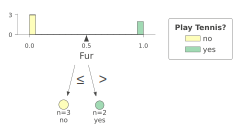

In [20]:
mammal_viz = dtreeviz.model(mammal_dtree,
                     X_train = mfeatures_df,
                     y_train = mi_target_df,
                     target_name = 'Play Tennis?',
                     feature_names = mfeatures_df.columns,
                     class_names = ['no', 'yes']
                     )
mammal_viz.view()